# Precipitation data obtaining example

GPCC data: https://psl.noaa.gov/data/gridded/data.gpcc.html

data catalog: https://psl.noaa.gov/thredds/catalog/Datasets/gpcc/full_v7/catalog.html?dataset=Datasets/gpcc/full_v7/precip.mon.total.2.5x2.5.v7.nc

data visualization: https://psl.noaa.gov/mddb2/makePlot.html?variableID=1627&fileID=93188

___

NetCDF data brief explanation: https://www.youtube.com/watch?v=UvNBnjiTXa0

NetCDF data python brief starter guide: https://www.youtube.com/watch?v=VH-PCQ991fw

NetCDF data python more in depth guide: https://www.youtube.com/watch?v=ue55Mxe4yVQ&list=PLLxyyob7YmEE8S3QDs1PZQkiBxA4zn_Gx

In [1]:
import numpy as np
import netCDF4 as nc

In [2]:
fp = '../data/precip.mon.total.2.5x2.5.v7.nc'
ds = nc.Dataset(fp)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Created 01/2016 based on V7 data obtained via ftp
    title: GPCC Precipitation Full V7 2.5x2.5 Monthly Total
    Conventions: CF 1.0
    References: http://www.psl.noaa.gov/data/gridded/data.gpcc.html
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.dwd.de/bvbw/appmanager/bvbw/dwdwwwDesktop/?_nfpb=true&_pageLabel=_dwdwww_klima_umwelt_datenzentren_wzn&T12404518261141645246564gsbDocumentPath=Content%2FOeffentlichkeit%2FKU%2FKU4%2FKU42%2Fteaser__product__access.html&_state=maximized&_windowLabel=T12404518261141645246564&lastPageLabel=_dwdwww_klima_umwelt_datenzentren_wzn
    original_source: ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulld

In [3]:
ds.variables.keys()

dict_keys(['lat', 'lon', 'time', 'precip'])

In [4]:
ds.variables['precip'].long_name

'GPCC Monthly Total of precipitation'

In [5]:
ds.variables['precip']

<class 'netCDF4._netCDF4.Variable'>
float32 precip(time, lat, lon)
    long_name: GPCC Monthly Total of precipitation
    units: mm
    missing_value: -9.96921e+36
    dataset: GPCC Precipitation 2.5degree V7 Full Reanalysis
    actual_range: [   0.   2386.46]
    parent_stat: Observations
    var_desc: Precipitation
    level_desc: Surface
    valid_range: [   0. 8000.]
    statistic: Total
    level: Surface
unlimited dimensions: time
current shape = (1356, 72, 144)
filling on, default _FillValue of 9.969209968386869e+36 used

<br>
<br>
<br>

Let us investigate one of the variables content: the precipitation variable (precip).

In [6]:
precip = ds['precip']
precip

<class 'netCDF4._netCDF4.Variable'>
float32 precip(time, lat, lon)
    long_name: GPCC Monthly Total of precipitation
    units: mm
    missing_value: -9.96921e+36
    dataset: GPCC Precipitation 2.5degree V7 Full Reanalysis
    actual_range: [   0.   2386.46]
    parent_stat: Observations
    var_desc: Precipitation
    level_desc: Surface
    valid_range: [   0. 8000.]
    statistic: Total
    level: Surface
unlimited dimensions: time
current shape = (1356, 72, 144)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
print(ds['precip'][10][10][10])

41.92


In [8]:
precip = precip[:]
precip

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [9]:
precip[0,10,10]

38.21

In [10]:
precip[10, 10:20, 20:30]

masked_array(
  data=[[43.790000915527344, 43.88999938964844, 49.16999816894531,
         66.26000213623047, 30.190000534057617, 22.229999542236328,
         24.850000381469727, 25.700000762939453, 26.68000030517578,
         23.799999237060547],
        [45.7400016784668, 48.0099983215332, 53.119998931884766,
         43.79999923706055, 27.049999237060547, 27.520000457763672,
         34.599998474121094, 37.459999084472656, 32.650001525878906,
         29.020000457763672],
        [63.380001068115234, 64.12000274658203, 85.58000183105469,
         83.69999694824219, 40.36000061035156, 32.81999969482422,
         35.65999984741211, 41.849998474121094, 39.5099983215332,
         28.799999237060547],
        [73.27999877929688, 87.12999725341797, 105.91999816894531,
         66.2300033569336, 27.399999618530273, 28.25, 27.579999923706055,
         23.09000015258789, 22.799999237060547, 15.359999656677246],
        [48.540000915527344, 79.48999786376953, 122.16000366210938,
         57.02

<br>
<br>
<br>

Masked array is an array that may contain missing or invalid values. The numby.ma module provides a nearly workalike replacement for the numpy library but with suport for this types of data structures (data arrays with masks). The documentation can be found [here](https://numpy.org/doc/stable/reference/maskedarray.generic.html#rationale). The precipitation variable from the netcdf file is stored in one of such data structure.

In [11]:
type(precip)

numpy.ma.core.MaskedArray

In [12]:
precip.shape

(1356, 72, 144)

In [13]:
precip[10, 10, 10]

41.92

In [14]:
precip[0, 0:7, 0:7]

masked_array(
  data=[[--, --, --, --, --, --, --],
        [--, --, --, --, --, --, --],
        [--, --, --, --, --, --, --],
        [--, --, --, --, --, 47.650001525878906, 47.22999954223633],
        [--, --, --, --, 47.75, 46.869998931884766, 42.5099983215332],
        [--, --, --, --, --, 48.2599983215332, 46.31999969482422],
        [--, --, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True]],
  fill_value=-9.96921e+36,
  dtype=float32)

<br>
<br>
<br>

Now, we will investigate spacific coordinates to obtain a precipitation time series for a given lat, lon.

In [15]:
import pandas as pd

In [16]:
print(ds['lat'][:])

[ 88.75  86.25  83.75  81.25  78.75  76.25  73.75  71.25  68.75  66.25
  63.75  61.25  58.75  56.25  53.75  51.25  48.75  46.25  43.75  41.25
  38.75  36.25  33.75  31.25  28.75  26.25  23.75  21.25  18.75  16.25
  13.75  11.25   8.75   6.25   3.75   1.25  -1.25  -3.75  -6.25  -8.75
 -11.25 -13.75 -16.25 -18.75 -21.25 -23.75 -26.25 -28.75 -31.25 -33.75
 -36.25 -38.75 -41.25 -43.75 -46.25 -48.75 -51.25 -53.75 -56.25 -58.75
 -61.25 -63.75 -66.25 -68.75 -71.25 -73.75 -76.25 -78.75 -81.25 -83.75
 -86.25 -88.75]


In [17]:
ds['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-1-1 00:00:00
    actual_range: [36889. 78131.]
    delta_t: 0000-01-00 00:00:00
    standard_name: time
    axis: T
    coordinate_defines: start
    totalling_period: 0000-01-00 00:00:00
    avg_period: 00-01-0000
unlimited dimensions: time
current shape = (1356,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [18]:
print(ds['time'][:][0:10])

[36889. 36920. 36948. 36979. 37009. 37040. 37070. 37101. 37132. 37162.]


In [19]:
print(ds['time'][:].count())
print(len(ds['time'][:]))
time = ds['time'][:].filled(np.nan)
print(time)

1356
1356
[36889. 36920. 36948. ... 78070. 78101. 78131.]


In [20]:
ds['precip'][:].filled(np.nan)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [21]:
from datetime import timedelta
start_date = pd.Timestamp('1800-1-1')
time = pd.Series(ds['time'][:].filled(np.nan))
time = time.apply(lambda x: start_date + timedelta(x))
time

0      1901-01-01
1      1901-02-01
2      1901-03-01
3      1901-04-01
4      1901-05-01
          ...    
1351   2013-08-01
1352   2013-09-01
1353   2013-10-01
1354   2013-11-01
1355   2013-12-01
Length: 1356, dtype: datetime64[ns]

In [22]:
import xarray as xr

In [23]:
ds = xr.open_dataset(fp)
df = ds.to_dataframe()
# df = df.reset_index(level=[0,1])
df = df.reset_index()

In [24]:
df.head()

,lat,lon,time,precip
0,88.75,1.25,1901-01-01,NaN
1,88.75,1.25,1901-02-01,NaN
2,88.75,1.25,1901-03-01,NaN
3,88.75,1.25,1901-04-01,NaN
4,88.75,1.25,1901-05-01,NaN


In [25]:
df.shape

(14059008, 4)

In [26]:
df['lat'].unique()

array([ 88.75,  86.25,  83.75,  81.25,  78.75,  76.25,  73.75,  71.25,
        68.75,  66.25,  63.75,  61.25,  58.75,  56.25,  53.75,  51.25,
        48.75,  46.25,  43.75,  41.25,  38.75,  36.25,  33.75,  31.25,
        28.75,  26.25,  23.75,  21.25,  18.75,  16.25,  13.75,  11.25,
         8.75,   6.25,   3.75,   1.25,  -1.25,  -3.75,  -6.25,  -8.75,
       -11.25, -13.75, -16.25, -18.75, -21.25, -23.75, -26.25, -28.75,
       -31.25, -33.75, -36.25, -38.75, -41.25, -43.75, -46.25, -48.75,
       -51.25, -53.75, -56.25, -58.75, -61.25, -63.75, -66.25, -68.75,
       -71.25, -73.75, -76.25, -78.75, -81.25, -83.75, -86.25, -88.75],
      dtype=float32)

In [27]:
ds['lon']

<xarray.DataArray 'lon' (lon: 144)>
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,
        91.25,  93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25,
       113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
       158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25,
       203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75,
       226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25,
       248.75, 251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75,
       271.25, 273.75, 276.25, 278.75, 281.25, 283.75, 286.25, 288.75, 291.25,
       293.75, 296.25, 298.75, 301.25, 303.75, 306.25, 308.75, 311.25, 313.75,
       316.25, 318.75, 321.25, 323.75, 326.25, 328.75, 331.25, 333.75, 336.25,
       338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75, 356.25, 358.75],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:           Longitude
    units:               degrees_east
    standard_name:       longitude
    actual_range:        [  1.25 358.75]
    axis:                X
    coordinate_defines:  center

In [28]:
df['lon'].unique()

array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,  46.25,  48.75,  51.25,  53.75,  56.25,  58.75,
        61.25,  63.75,  66.25,  68.75,  71.25,  73.75,  76.25,  78.75,
        81.25,  83.75,  86.25,  88.75,  91.25,  93.75,  96.25,  98.75,
       101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75,
       121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
       141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75,
       201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75,
       221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75,
       241.25, 243.75, 246.25, 248.75, 251.25, 253.75, 256.25, 258.75,
       261.25, 263.75, 266.25, 268.75, 271.25, 273.75, 276.25, 278.75,
      

In [29]:
central_amazon_data = df[(df['lat']<=1.25) & (df['lat']>=-11.25) & (df['lon']>=111.25) & (df['lon']<=131.25)]

In [30]:
central_amazon_data.shape

(73224, 4)

In [31]:
central_amazon_data.sample(3)

,lat,lon,time,precip
7093814,-1.25,118.75,1949-03-01,109.570000
7685377,-8.75,128.75,1978-02-01,210.949997
7295663,-3.75,131.25,1932-12-01,138.729996


In [32]:
central_amazon_data.head(3)

,lat,lon,time,precip
6893904,1.25,111.25,1901-01-01,229.119995
6893905,1.25,111.25,1901-02-01,563.409973
6893906,1.25,111.25,1901-03-01,946.859985


In [33]:
import matplotlib.pyplot as plt

In [34]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
import numpy as np

In [35]:
geom = [Point(x,y) for x, y in zip(central_amazon_data['lon'], central_amazon_data['lat'])]

In [36]:
gdf = gpd.GeoDataFrame(central_amazon_data, geometry=geom)
gdf.head()

,lat,lon,time,precip,geometry
6893904,1.25,111.25,1901-01-01,229.119995,POINT (111.25000 1.25000)
6893905,1.25,111.25,1901-02-01,563.409973,POINT (111.25000 1.25000)
6893906,1.25,111.25,1901-03-01,946.859985,POINT (111.25000 1.25000)
6893907,1.25,111.25,1901-04-01,314.079987,POINT (111.25000 1.25000)
6893908,1.25,111.25,1901-05-01,188.020004,POINT (111.25000 1.25000)


Basemap basic usage tutorial: https://medium.com/@yonas.mersha14/mapping-geographical-data-with-basemap-python-package-beaa1ed87e0a

In [117]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [118]:
central_amazon_data_1912 = central_amazon_data[central_amazon_data['time']=='1912-01-01'].copy()
lat = np.sort(central_amazon_data_1912['lat'].unique())
lon = np.sort(central_amazon_data_1912['lon'].unique())

In [120]:
data = central_amazon_data_1912[['precip', 'lat', 'lon']].pivot(index='lon', columns='lat', values='precip')
data

lat,-11.25,-8.75,-6.25,-3.75,-1.25,1.25
lon,,,,,,
111.25,NaN,416.350006,449.440002,238.949997,288.769989,273.540009
113.75,NaN,493.760010,347.890015,348.070007,277.540009,332.989990
116.25,NaN,314.119995,446.579987,426.670013,385.190002,257.079987
118.75,274.200012,190.020004,414.450012,311.170013,204.970001,49.480000
121.25,154.270004,222.820007,226.130005,287.920013,217.660004,60.430000
123.75,189.279999,122.040001,230.460007,240.539993,70.309998,247.809998
126.25,120.750000,289.540009,NaN,229.009995,118.779999,279.269989
128.75,NaN,421.209991,404.750000,169.199997,152.699997,95.739998
131.25,313.410004,390.149994,317.420013,166.479996,190.179993,218.710007


In [121]:
data=np.nan_to_num(data.to_numpy(), nan=np.nanmean(precip))

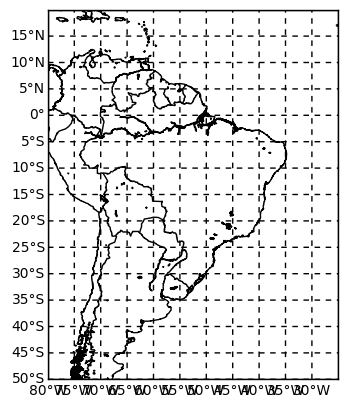

In [122]:
m = Basemap(projection='cyl', llcrnrlon=-80, llcrnrlat=-50, urcrnrlon=-25, urcrnrlat=20, resolution='i')
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.show()

In [123]:
x, y = m(*np.meshgrid(lon,lat))
np.meshgrid(lon,lat)

[array([[111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75,
         131.25],
        [111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75,
         131.25],
        [111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75,
         131.25],
        [111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75,
         131.25],
        [111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75,
         131.25],
        [111.25, 113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75,
         131.25]], dtype=float32),
 array([[-11.25, -11.25, -11.25, -11.25, -11.25, -11.25, -11.25, -11.25,
         -11.25],
        [ -8.75,  -8.75,  -8.75,  -8.75,  -8.75,  -8.75,  -8.75,  -8.75,
          -8.75],
        [ -6.25,  -6.25,  -6.25,  -6.25,  -6.25,  -6.25,  -6.25,  -6.25,
          -6.25],
        [ -3.75,  -3.75,  -3.75,  -3.75,  -3.75,  -3.75,  -3.75,  -3.75,
          -3.75],
        [ -1.25,  -1.25,  -1.25,  -1.25,  -1.25,  -1.25,  -1.25,  -1.25,


c:\Users\mathe\my_git_repositories\climate-data-preprocessing\.venv\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\Users\mathe\my_git_repositories\climate-data-preprocessing\.venv\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


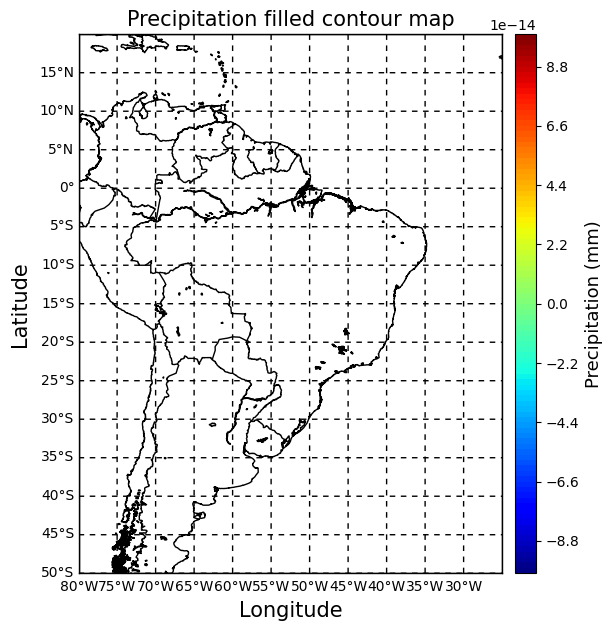

In [125]:
fig = plt.figure(num=None, figsize=(7, 7) ) 
m = Basemap(projection='cyl', llcrnrlon=-80, llcrnrlat=-50, urcrnrlon=-25, urcrnrlat=20, resolution='i')
x, y = m(*np.meshgrid(lat,lon))
cs = m.contourf(x, y ,data, levels = 100, cmap=plt.cm.jet)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Precipitation (mm)', fontsize=13)
plt.title('Precipitation filled contour map', fontsize=15)
plt.show()

## Using Basemap for geo-spatial data visualization.

In [217]:
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
fp = '../data/precip.mon.total.2.5x2.5.v7.nc'
ds = nc.Dataset(fp)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Created 01/2016 based on V7 data obtained via ftp
    title: GPCC Precipitation Full V7 2.5x2.5 Monthly Total
    Conventions: CF 1.0
    References: http://www.psl.noaa.gov/data/gridded/data.gpcc.html
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.dwd.de/bvbw/appmanager/bvbw/dwdwwwDesktop/?_nfpb=true&_pageLabel=_dwdwww_klima_umwelt_datenzentren_wzn&T12404518261141645246564gsbDocumentPath=Content%2FOeffentlichkeit%2FKU%2FKU4%2FKU42%2Fteaser__product__access.html&_state=maximized&_windowLabel=T12404518261141645246564&lastPageLabel=_dwdwww_klima_umwelt_datenzentren_wzn
    original_source: ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulld

In [128]:
ds.variables.keys()

dict_keys(['lat', 'lon', 'time', 'precip'])

In [259]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
time = ds.variables['time'][:]
precip = ds.variables['precip'][:]

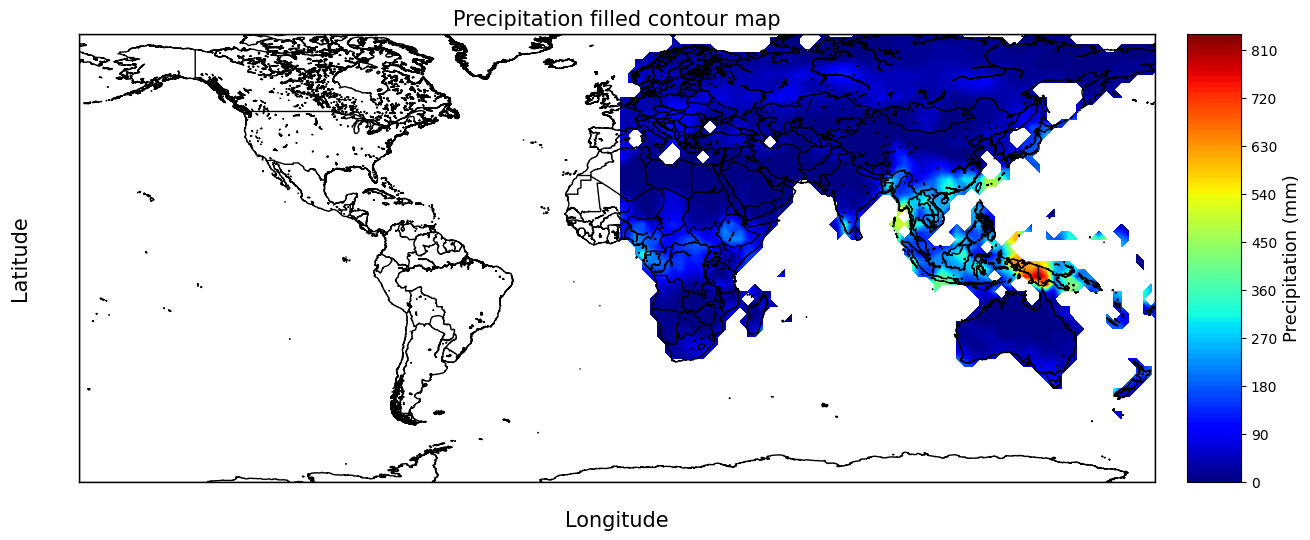

In [260]:
fig = plt.figure(num=None, figsize=(15, 15) ) 
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-75, urcrnrlon=180, urcrnrlat=75, resolution='i')
lon, lat = np.meshgrid(lons,lats)
x, y = m(lon, lat)
# cs = m.pcolor(x, y , np.squeeze(precip[0,:,:]), cmap='jet')
cs = m.contourf(x, y , np.squeeze(precip[100,:,:]), cmap='jet', levels = 100)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
# m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
# m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Precipitation (mm)', fontsize=13)
plt.title('Precipitation filled contour map', fontsize=15)
plt.show()

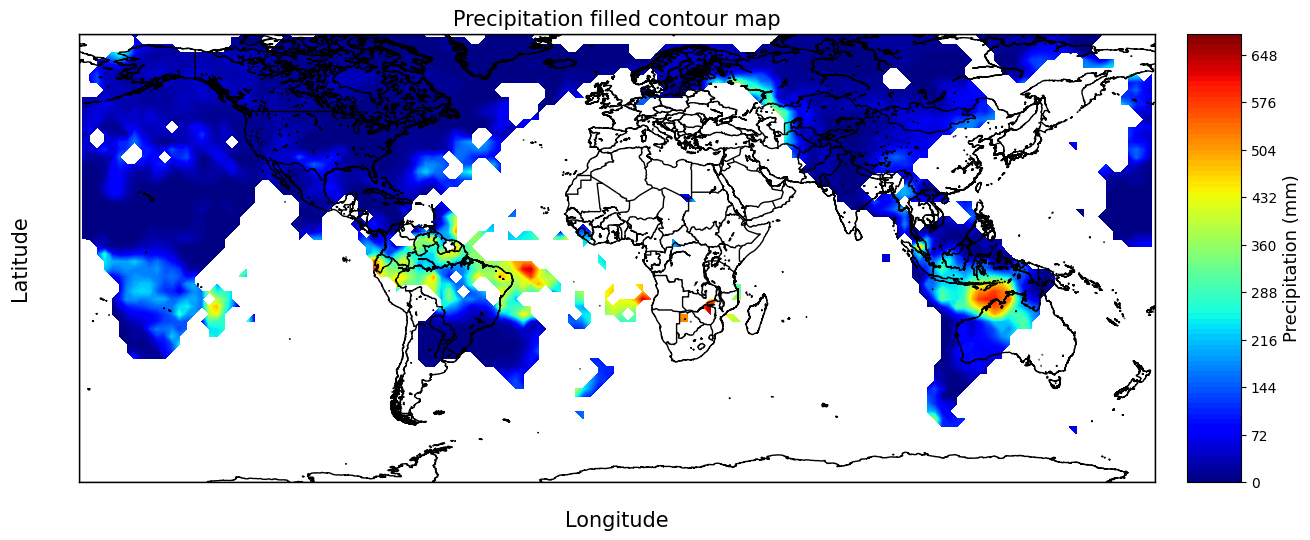

In [263]:
fig = plt.figure(num=None, figsize=(15, 15) ) 
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-75, urcrnrlon=180, urcrnrlat=75, resolution='i', anchor='SW')

lons = np.sort(np.where(lons > 180, -(360-lons), lons))

lon, lat = np.meshgrid(lons,lats)

x, y = m(lon, lat)

pr = np.squeeze(precip[0,:,:])
# cs = m.pcolor(x, y , pr, cmap='jet')
cs = m.contourf(x, y , pr, cmap='jet', levels = 100)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
# m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
# m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Precipitation (mm)', fontsize=13)
plt.title('Precipitation filled contour map', fontsize=15)
plt.show()

In [ ]:
fp = 'data/precip.mon.total.2.5x2.5.v7.nc'
ds = nc.Dataset(fp)
ds

Solution for coordinate conversion obtained from stack: https://stackoverflow.com/questions/54736229/matplotlibs-basemap-seems-to-not-store-maps-center-for-later-overplotting-of-d

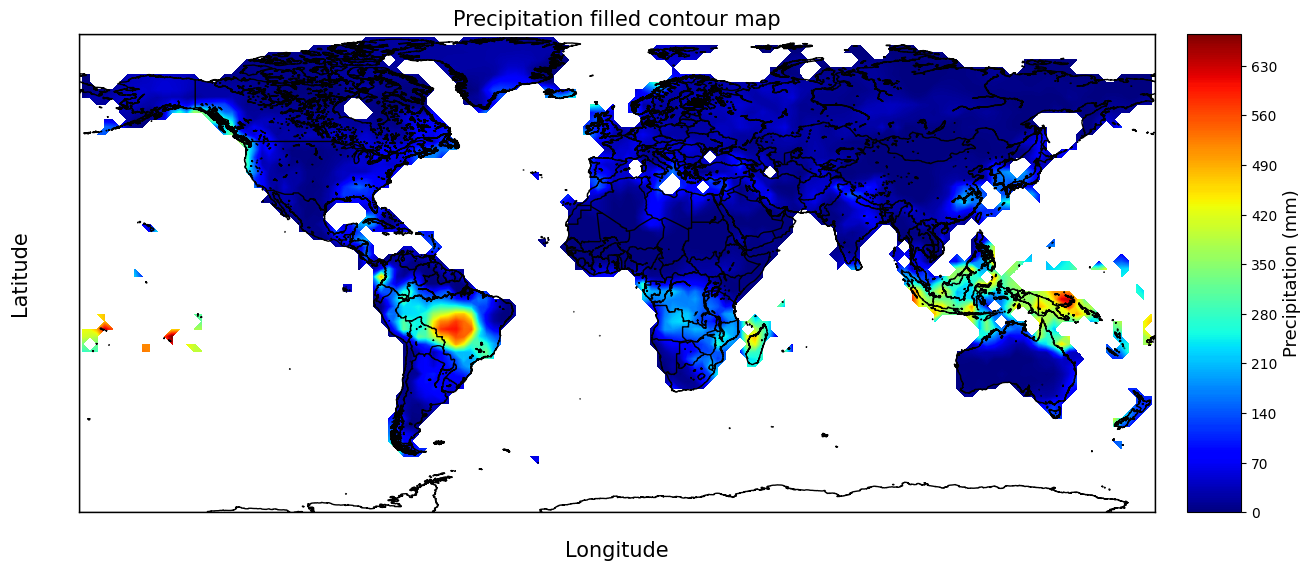

In [269]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
precip = ds.variables['precip'][:]

###  Section added ################
# map lon values to -180..180 range
f = lambda x: ((x+180) % 360) - 180
lons = f(lons)
# rearange data
ind = np.argsort(lons)
lons = lons[ind]
precip = precip[:, :, ind]

##################################


fig = plt.figure(num=None, figsize=(15, 15) ) 
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-75, urcrnrlon=180, urcrnrlat=85, resolution='i')

lon, lat = np.meshgrid(lons,lats)

x, y = m(lon, lat)

pr = np.squeeze(precip[0,:,:])
# cs = m.pcolor(x, y , pr, cmap='jet')
cs = m.contourf(x, y , pr, cmap='jet', levels = 300)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
# m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
# m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Precipitation (mm)', fontsize=13)
plt.title('Precipitation filled contour map', fontsize=15)
plt.show()

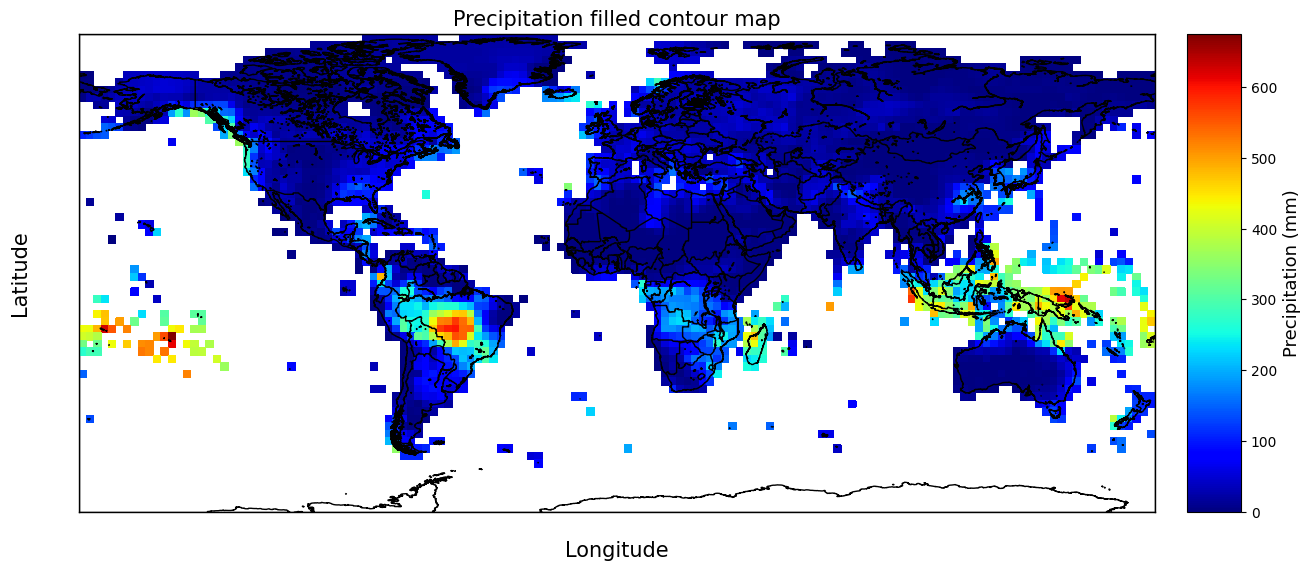

In [270]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
precip = ds.variables['precip'][:]

###  Section added ################
# map lon values to -180..180 range
f = lambda x: ((x+180) % 360) - 180
lons = f(lons)
# rearange data
ind = np.argsort(lons)
lons = lons[ind]
precip = precip[:, :, ind]

##################################


fig = plt.figure(num=None, figsize=(15, 15) ) 
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-75, urcrnrlon=180, urcrnrlat=85, resolution='i')

lon, lat = np.meshgrid(lons,lats)

x, y = m(lon, lat)

pr = np.squeeze(precip[0,:,:])
# cs = m.pcolor(x, y , pr, cmap='jet')
cs = m.pcolor(x, y , pr, cmap='jet')
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
# m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
# m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Precipitation (mm)', fontsize=13)
plt.title('Precipitation filled contour map', fontsize=15)
plt.show()

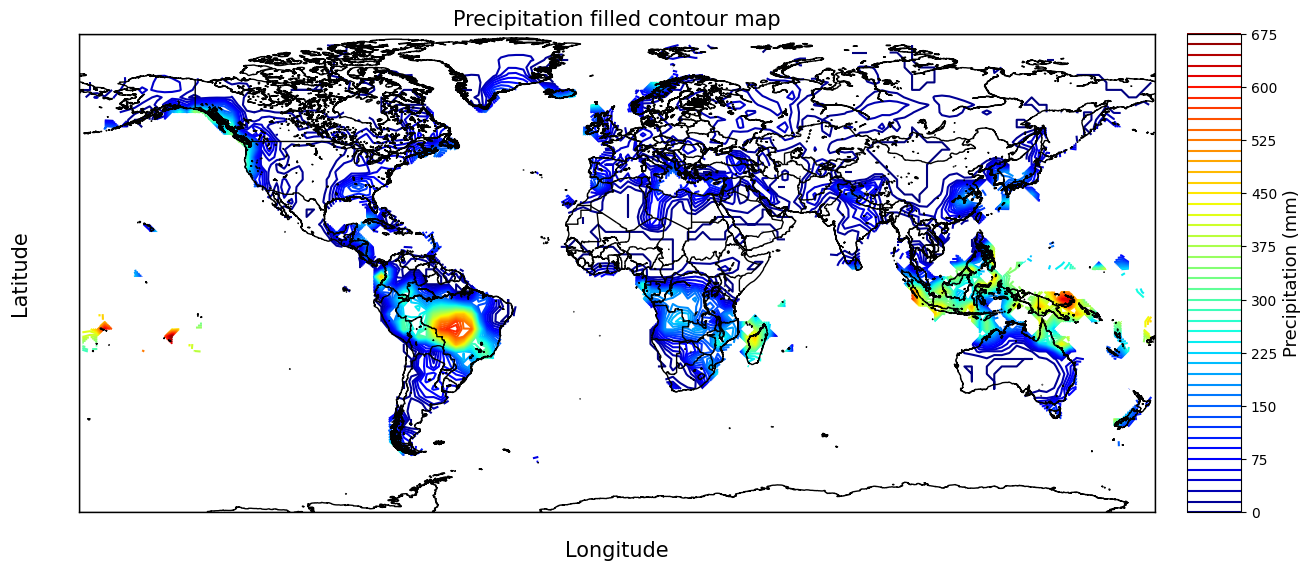

In [273]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
precip = ds.variables['precip'][:]

###  Section added ################
# map lon values to -180..180 range
f = lambda x: ((x+180) % 360) - 180
lons = f(lons)
# rearange data
ind = np.argsort(lons)
lons = lons[ind]
precip = precip[:, :, ind]

##################################


fig = plt.figure(num=None, figsize=(15, 15) ) 
m = Basemap(projection='cyl', llcrnrlon=-180, llcrnrlat=-75, urcrnrlon=180, urcrnrlat=85, resolution='i')

lon, lat = np.meshgrid(lons,lats)

x, y = m(lon, lat)

pr = np.squeeze(precip[0,:,:])
# cs = m.pcolor(x, y , pr, cmap='jet')
cs = m.contour(x, y , pr, cmap='jet', levels = 50)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
# m.drawmeridians(range(-80, -25, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
# m.drawparallels(range(-50, 20, 5), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Precipitation (mm)', fontsize=13)
plt.title('Precipitation filled contour map', fontsize=15)
plt.show()